In [31]:
%matplotlib inline
import numpy as np

import matplotlib.pylab as plt
from __future__ import print_function, division # bring the print function and division of Python3 to 2.7

In [32]:
def inv_F(x, tau, tmax, tmin):
    return - np.log(x * (np.exp(-tmax/tau) - np.exp(-tmin/tau)) + np.exp(-tmin/tau)) * tau

In [33]:
tau = 2200

In [34]:
mc_events = 50000
rnd = np.random.rand(mc_events)
data3 = inv_F(rnd , tau, 20000, 500)

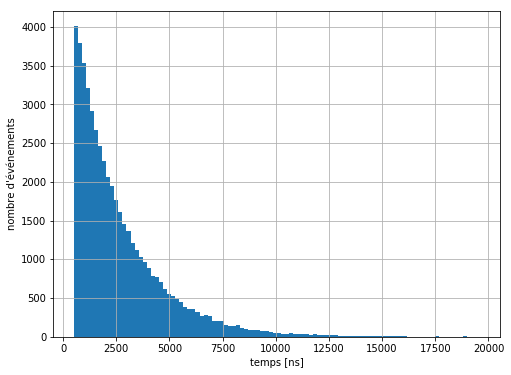

In [35]:
fig, ax = plt.subplots(figsize=(8,6))
plt.grid()
ax.hist(data3,bins = 100)

ax.set_xlabel("temps [ns]")
ax.set_ylabel("nombre d'événements")

plt.show()

In [36]:
mc_events1 = 50000
rnd = np.random.rand(mc_events1)
data = inv_F(rnd , tau, 20000, 500)

In [37]:
print(data)

[ 4888.77252469  5921.72796274  2763.74300538 ...,  1448.78142613
  1843.17737309  1517.76987629]


In [38]:
N = 50000
tmin = 500.
tmax = 20000.

In [39]:
def Lstar(N, x, tau, tmin, tmax):
    
    return  N*np.log(tau) + N*np.log(np.exp(-tmin/tau) - np.exp(-tmax/tau)) + np.sum(x/tau)

In [40]:
L = []

tt = np.arange(tmin, tmax, 1.)

for tau in tt:
    P = Lstar(N, data, tau, tmin , tmax)
    L.append(P)
    
tbestL = tt[np.where(L == np.min(L))]

In [41]:

print(tt[np.where(L == np.min(L))])
print(np.min(L))

[ 2190.]
434521.218887


In [42]:

print(tbestL)

[ 2190.]


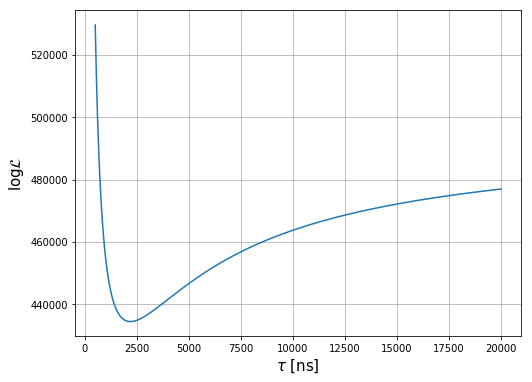

In [43]:
fig1, ax1 = plt.subplots(figsize=(8,6))
plt.grid()
ax1.plot(tt, L)
ax1.set_xlabel(r"$\tau$ [ns]", fontsize=15)
ax1.set_ylabel("$\log \mathcal{L}$", fontsize=15)

plt.show()

In [44]:
def exp_decay(x, tau, tmin, tmax):
    
    return (1/tau) * (1/(np.exp(-tmin/tau) - np.exp(-tmax/tau))) * np.exp(-x/tau)

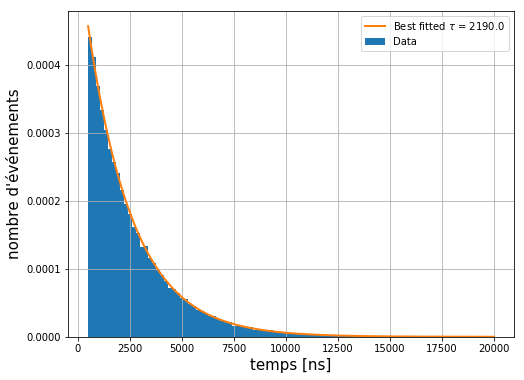

In [52]:
fig2, ax2 = plt.subplots(figsize=(8,6))
plt.grid()
ax2.hist(data,bins = 100,normed=True, label="Data")
x = np.arange(tmin, tmax, 1.)

# If the histogram is NOT normalized (normed = False) I need to rescale the PDF by the number of mc event and the binwidth
#  binwidth = np.diff(bins)[0]
#  ax4.plot(x, exp_decay(x, 1/tbest*len(data2)*binwidth, tbest, y0), lw =2 , label=r"Best fitted $\tau$ = %.1f"%tbest)

ax2.plot(x, exp_decay(x, tbestL, tmin, tmax),lw =2 , label=r"Best fitted $\tau$ = %.1f"%tbestL)

ax2.set_xlabel("temps [ns]", fontsize=15)
ax2.set_ylabel("nombre d'événements", fontsize=15)

plt.legend()


plt.show()

In [46]:
tbestL 
print(np.min(L))
print(np.min(L) + )

SyntaxError: invalid syntax (<ipython-input-46-e55fdccc4651>, line 3)

## calcul erreur

In [47]:
d = np.min(L) + 0.5
print(d)

434521.718887


In [48]:
#tau+sigma
tau = 2200
Y = Lstar(N, data, tau, tmin, tmax)

while Y < d:

    tau = tau + 0.5

    Y = Lstar(N, data, tau, tmin, tmax)

else:
    print(Y)
    print(tau)



434521.75674
2200.5


In [49]:
#tau-sigma
tau = 2200
Y = Lstar(N, data, tau, tmin, tmax)

while Y < d:

    tau = tau - 0.5

    Y = Lstar(N, data, tau, tmin, tmax)

else:
    print(Y)
    print(tau)


434521.763661
2180.0


In [50]:
print(tbestL)

[ 2190.]
